# Perceptron (Artificial Neuron)

## Neuron

<img src='https://cloud.google.com/blog/big-data/2016/07/images/146798944178238/neural-networks-7.png'/ style="width: 40%; height: auto;">  
from [Understanding neural networks with TensorFlow Playground](https://cloud.google.com/blog/big-data/2016/07/understanding-neural-networks-with-tensorflow-playground/)

## Perceptron (Artificial Neuron)
<img src='http://i.stack.imgur.com/VqOpE.jpg'/>  
from [Diagram of ANN](http://tex.stackexchange.com/questions/132444/diagram-of-an-artificial-neural-network)



- output: $ y = f(\mathtt{net}_j) $  
- activation function: $ f(\cdot) $  
- weighted sum to neuron: $\mathtt{net} = b + \sum_{i=1}^{N_i}{w_{i}x_i}$  
- bias of neuron: $b$  
- weight from the $i$ th input to neuron: $w_{i}$

if activation function $ f(\cdot) $ is logistic sigmoid function $$ \sigma(z) = \frac{1}{1+e^{-z}} $$


$$ \therefore  y = \frac{1}{1+e^{-(b + \sum_{i=1}^{N_i}{w_{i}x_i})}} $$

In [13]:
%matplotlib inline

import numpy as np
from numpy import random
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cm 
from numpy.testing import assert_array_almost_equal as assertEqual


## Activation Functions

### logistic sigmoid: $$  f(x) = \frac{1}{1 + e^{-x}} $$
### tanh:  $$  f(x) = \frac{1 - e^{-2 x}}{1 + e^{-2 x}} $$
### linear:  $$  f(x) = x $$
### ReLU:  Rectified Linear Unit $$  f(x) = max(0,x) $$


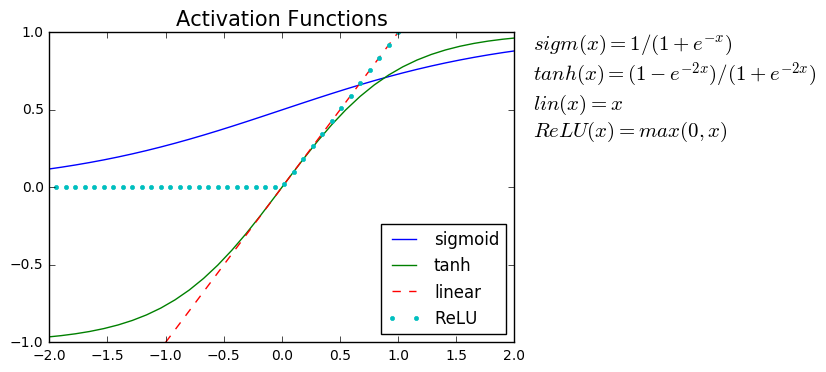

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))

def lin(x):
    return x

def ReLU(x):
    return np.maximum(0, x)

xx = np.linspace(-3, 3)
xx1 = np.linspace(-1, 1)
xx2 = np.linspace(-3, 1)

ax = plt.figure().add_subplot(111)
ax.plot(xx, sigmoid(xx), label='sigmoid')
ax.plot(xx, tanh(xx), label='tanh')
ax.plot(xx1, lin(xx1), '--', label='linear')
ax.plot(xx2, ReLU(xx2), '.', label='ReLU')
ax.axis([-2, 2, -1, 1])
#ax.axis('equal')
ax.legend(loc=4)
ax.set_title(u'Activation Functions', fontsize=15)

strTxt = '\n'.join(['$sigm(x) = 1/ (1 + e^{-x})$', 
                    '$tanh(x) = (1 - e^{-2 x})/(1 + e^{-2 x})$',
                    '$lin(x) = x$',
                    '$ReLU(x) = max(0, x)$'
                   ])
ax.text(1.04, 1, strTxt, 
        transform=ax.transAxes, verticalalignment='top', fontsize=15)
            
plt.show()

In [15]:
def plot_bi_data(x, y, title = u'',
                       markers = [u'x', u'o'], 
                       colors = ['r', 'b'], 
                       labels = [u'N', u'Y'],
                       ax = None):
    idx = [0, 0]
    
    classes = np.unique(y)
    
    for i in range(2):
        idx[i] = (np.where(y==classes[i])[0])
    
    if (ax == None):
        ax = plt.figure().add_subplot(111)
        
    for i in (1, 0):
        ax.plot(x[idx[i],0], x[idx[i],1], markers[i], 
                                          color=colors[i], 
                                          label= labels[i]) 
    ax.set_title(title)
    ax.legend()
    
    return ax

def plot_DecisionBoundary(x, clf, opt):
    x0_min, x0_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    h = 0.05
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                         np.arange(x1_min, x1_max, h))
    
    yy = clf(np.c_[xx0.ravel(), xx1.ravel()], opt)
    yy = yy.reshape(xx0.shape)
    
    ax = plt.figure().add_subplot(111)
    ax.contourf(xx0, xx1, yy, cmap=cmap)
    
    return ax

def plot_GD(x, y, clf, opt):
    ax = plot_DecisionBoundary(x, clf, opt)
    ax = plot_bi_data(x, y, ax=ax)
    
    return ax

## Derivative of Activation Function

### 테스트 방법
For $ h \ll 1 $,
$$ \frac{d f(x)}{d x} \approx \frac{f(x+h) - f(x)}{h} $$ 

or,

$$ \frac{d f(x)}{d x} \approx \frac{f(x+h) - f(x-h)}{2h} $$ 


In [40]:
def grad_sigmoid(x, o = None):
    if o is None:
        o = sigmoid(x)
        
    return np.multiply(o, (1 - o))

def grad_tanh(x, o = None):
    if o is None:
        o = tanh(x)
        
    return 1 - np.power(o,2)

def grad_lin(x, o = None):
    return 1

def grad_ReLU(x, o = None):
    return x >= 0


h = 1e-4
test_x = random.randn(10) * 2
assertEqual(grad_sigmoid(test_x), (sigmoid(test_x + h) - sigmoid(test_x - h)) / (2*h))
assertEqual(grad_tanh(test_x), (tanh(test_x + h) - tanh(test_x - h)) / (2*h))
assertEqual(grad_lin(test_x), (lin(test_x + h) - lin(test_x - h)) / (2*h))
assertEqual(grad_ReLU(test_x), (ReLU(test_x + h) - ReLU(test_x - h)) / (2*h))

test_x = random.randn(5, 3) * 2
assertEqual(grad_sigmoid(test_x), (sigmoid(test_x + h) - sigmoid(test_x - h)) / (2*h))
assertEqual(grad_tanh(test_x), (tanh(test_x + h) - tanh(test_x - h)) / (2*h))
assertEqual(grad_lin(test_x), (lin(test_x + h) - lin(test_x - h)) / (2*h))
assertEqual(grad_ReLU(test_x), (ReLU(test_x + h) - ReLU(test_x - h)) / (2*h))


In [41]:
def evaluate(x, w, actFn, nargout=1):
    X = np.hstack((np.ones([x.shape[0], 1]), x))
    a = np.dot(X, w)
    o = actFn(a)
    if nargout == 1:
        return o
    elif nargout == 2:
        return o, a
    elif nargout == 3:
        return o, a, X
    else:
        raise ValueError, "Invalid nargout!"

assertEqual(evaluate(random.rand(10,2), random.rand(3), ReLU).shape, [10,])
assertEqual(evaluate(random.rand(10,2), random.rand(3,1), ReLU).shape, [10,1])
        
def classify(x, opt = {'w':np.array([0, 1, 1]), 'actFn':sigmoid}, classes=[-1, 1]):
    o = evaluate(x, opt['w'], opt['actFn'])
    
    c = np.ones_like(o) * classes[1]
    
    actFn = opt['actFn']
    
    if actFn is sigmoid or actFn is ReLU:
        c[o < 0.5] = classes[0]
    else:
        c[o < 0] = classes[0]
    return c

assertEqual(classify(random.randn(10,2)).shape, [10,])
assertEqual(np.unique(classify(random.randn(10,2))), [-1, 1])
assertEqual(np.unique(classify(random.randn(10,2), classes=[-2, 2])), [-2, 2])

def lossFn(x, y, w, actFn):
    o = evaluate(x, w, actFn)
    
    e = np.array(y).reshape(o.shape) - o
    
    return 0.5 * np.sum(np.power(e, 2))

assertEqual(lossFn(random.randn(10,2), random.rand(10) > 0.5, random.randn(3,1), sigmoid).shape, [])
assertEqual(lossFn(np.matrix([[0,0],[0,0]]), np.array([0,0]), np.array([0,0,0]), sigmoid), 0.25)

def grad(x, y, w, actFn, gradFn):
    o,a,X = evaluate(x, w, actFn, nargout=3)
    e = np.array(y).reshape(o.shape) - o
    
    g = gradFn(a, o=o)
    
    return -X.T.dot(np.multiply(e, g))

h = 1e-4
test_x = random.randn(10, 2) * 2
test_y = [1 if i > 0.5 else 0 for i in random.rand(10)]
test_w = random.randn(3) * 0.1
test_actFn = ReLU
test_gradFn = grad_ReLU
assertEqual(grad(test_x, test_y, test_w, test_actFn, test_gradFn).shape, test_w.shape)
assertEqual(grad(test_x, test_y, test_w, test_actFn, test_gradFn)[0], 
            (lossFn(test_x, test_y, test_w + [h, 0, 0], test_actFn) - 
             lossFn(test_x, test_y, test_w - [h, 0, 0], test_actFn)) / (2*h))

assertEqual(grad(test_x, test_y, test_w, test_actFn, test_gradFn)[1], 
            (lossFn(test_x, test_y, test_w + [0, h, 0], test_actFn) - 
             lossFn(test_x, test_y, test_w - [0, h, 0], test_actFn)) / (2*h))

assertEqual(grad(test_x, test_y, test_w, test_actFn, test_gradFn)[2], 
            (lossFn(test_x, test_y, test_w + [0, 0, h], test_actFn) - 
             lossFn(test_x, test_y, test_w - [0, 0, h], test_actFn)) / (2*h))


In [45]:
def fit(x, y, epoch, mu, actFn=sigmoid, gradFn=grad_sigmoid, initW = 0.1):
    N, D = x.shape
    
    w = random.randn(D + 1) * initW
    
    for i in range(epoch):
        dE_dw = grad(x, y, w, actFn, gradFn)
        
    #    assertEqual(dE_dw.shape, w.shape)
        
        if (i % (epoch / 10) == 0):
            E = lossFn(x, y, w, actFn)
            ax = plot_GD(x, y, classify, opt={'w':w, 'actFn':actFn})
            
            ax.set_title(u'Epoch = %d' % i)
            ax.text(1.04, 1, '\n'.join('$w_{%d} = %f$' % (i, w[i]) for i in range(w.shape[0])), 
                        transform=ax.transAxes, verticalalignment='top', fontsize=15)
            
        w -= mu * dE_dw
    
    
    ax = plot_GD(x, y, classify, opt={'w':w, 'actFn':actFn})
    ax.set_title(u'Epoch = %d' % epoch)
    ax.text(1.04, 1, '\n'.join('$w_{%d} = %f$' % (i, w[i]) for i in range(w.shape[0])), 
            transform=ax.transAxes, verticalalignment='top', fontsize=15)
            
    return w


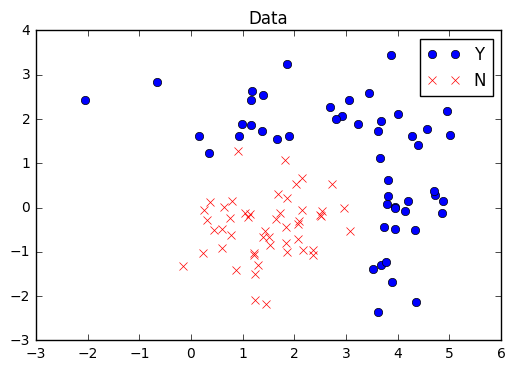

In [46]:
# Generate 2D data
N = 100

random.seed(5)

Yes = np.zeros([N/2, 2])
Yes1 = np.random.multivariate_normal([4, 0], [[0.3, 0], [0, 2]], N/4)
Yes2 = np.random.multivariate_normal([2, 2], [[2, 0], [0, 0.3]], N/4)
Yes[:N/4, :] = Yes1
Yes[N/4:, :] = Yes2

No = np.random.multivariate_normal([1.5, -0.5], [[0.5, 0], [0, 0.5]], N/2)

x = np.zeros([Yes.shape[0] + No.shape[0], 2])
x[:N/2, :2] = Yes
x[N/2:, :2] = No

y = np.append(np.ones(Yes.shape[0]),np.zeros(No.shape[0]))
    
plot_bi_data(x, y, title='Data')

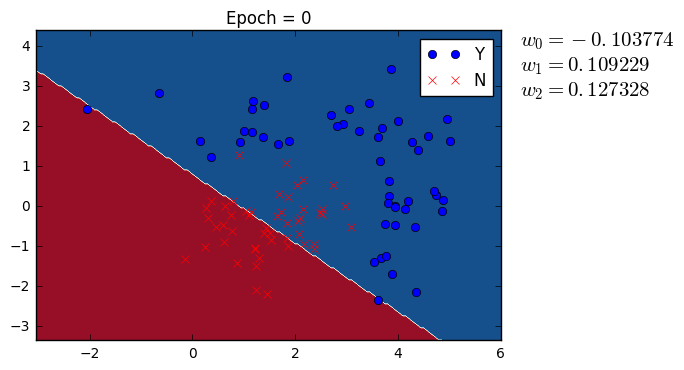

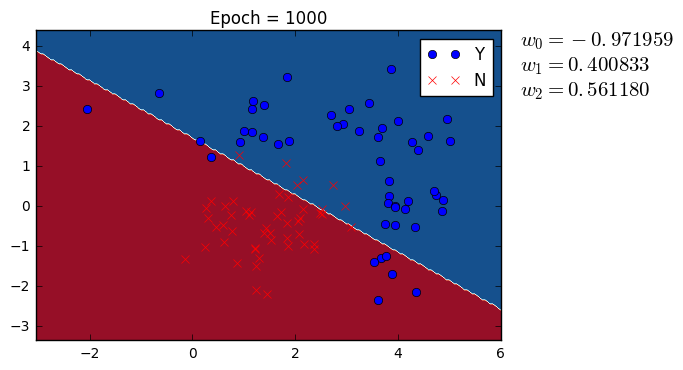

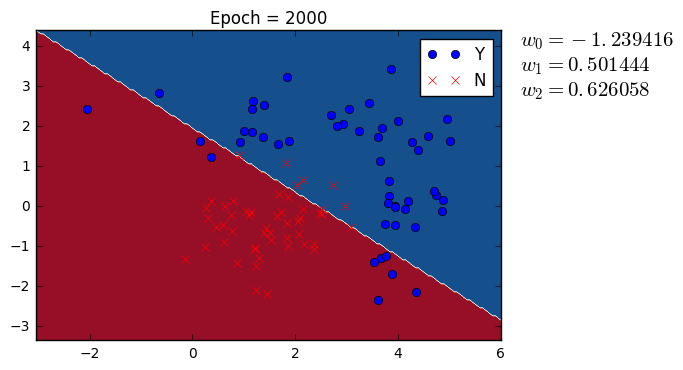

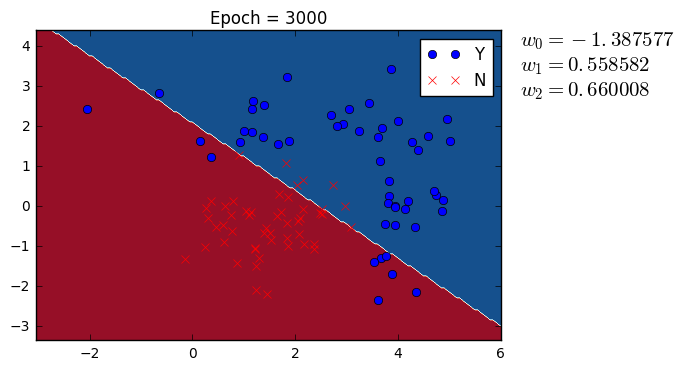

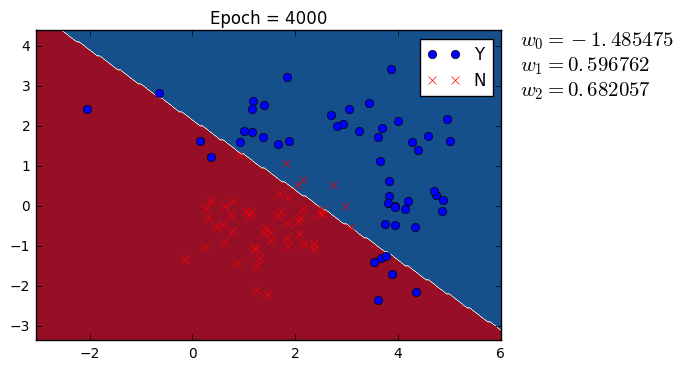

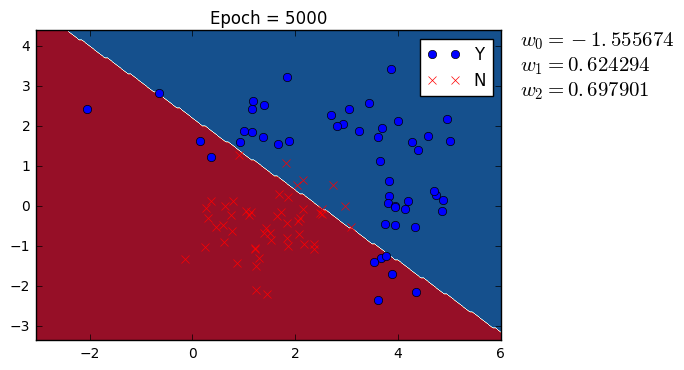

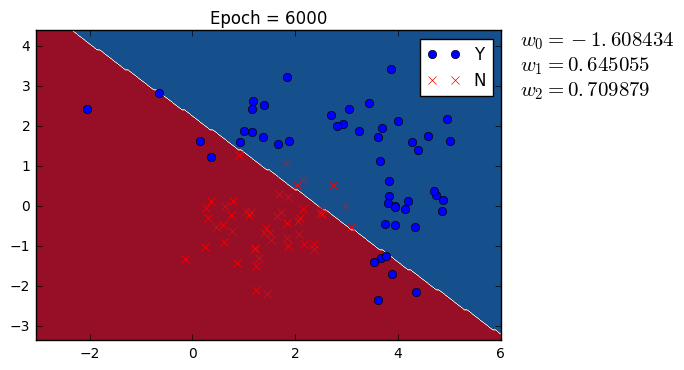

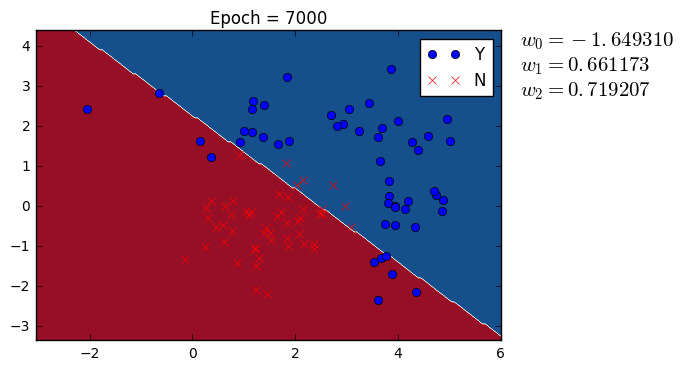

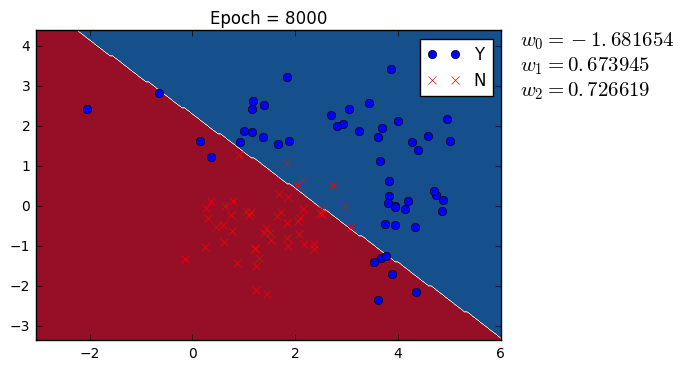

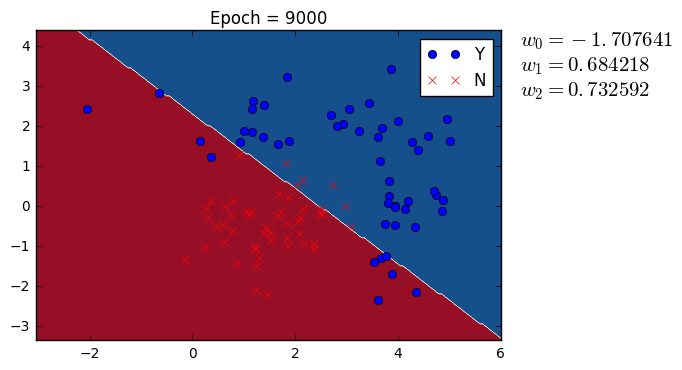

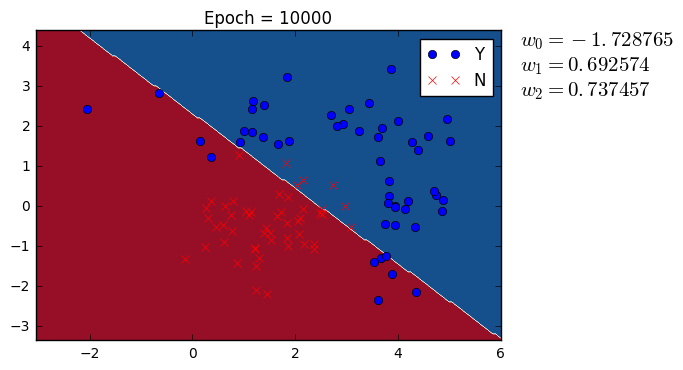

In [47]:
cmap = cm.RdBu

random.seed()

mu = 0.0001
epoch = 10000
actFn = tanh
gradFn = grad_tanh
initW = 0.1

y_=np.zeros_like(y)
y_[:] = y[:]
if actFn is tanh:
    y_[y==0] = -1
    
w = fit(x, y_, epoch, mu, actFn=actFn, gradFn=gradFn, initW= initW)


In [23]:
o = classify(x, opt = {'w':w, 'actFn':actFn}, classes=[0, 1])
np.mean(y == o)

0.83999999999999997